In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install pycaret

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [39]:
data = pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [40]:
data.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [41]:
data.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [42]:
data =  data.drop('id',axis=1)

<AxesSubplot:xlabel='calc', ylabel='Count'>

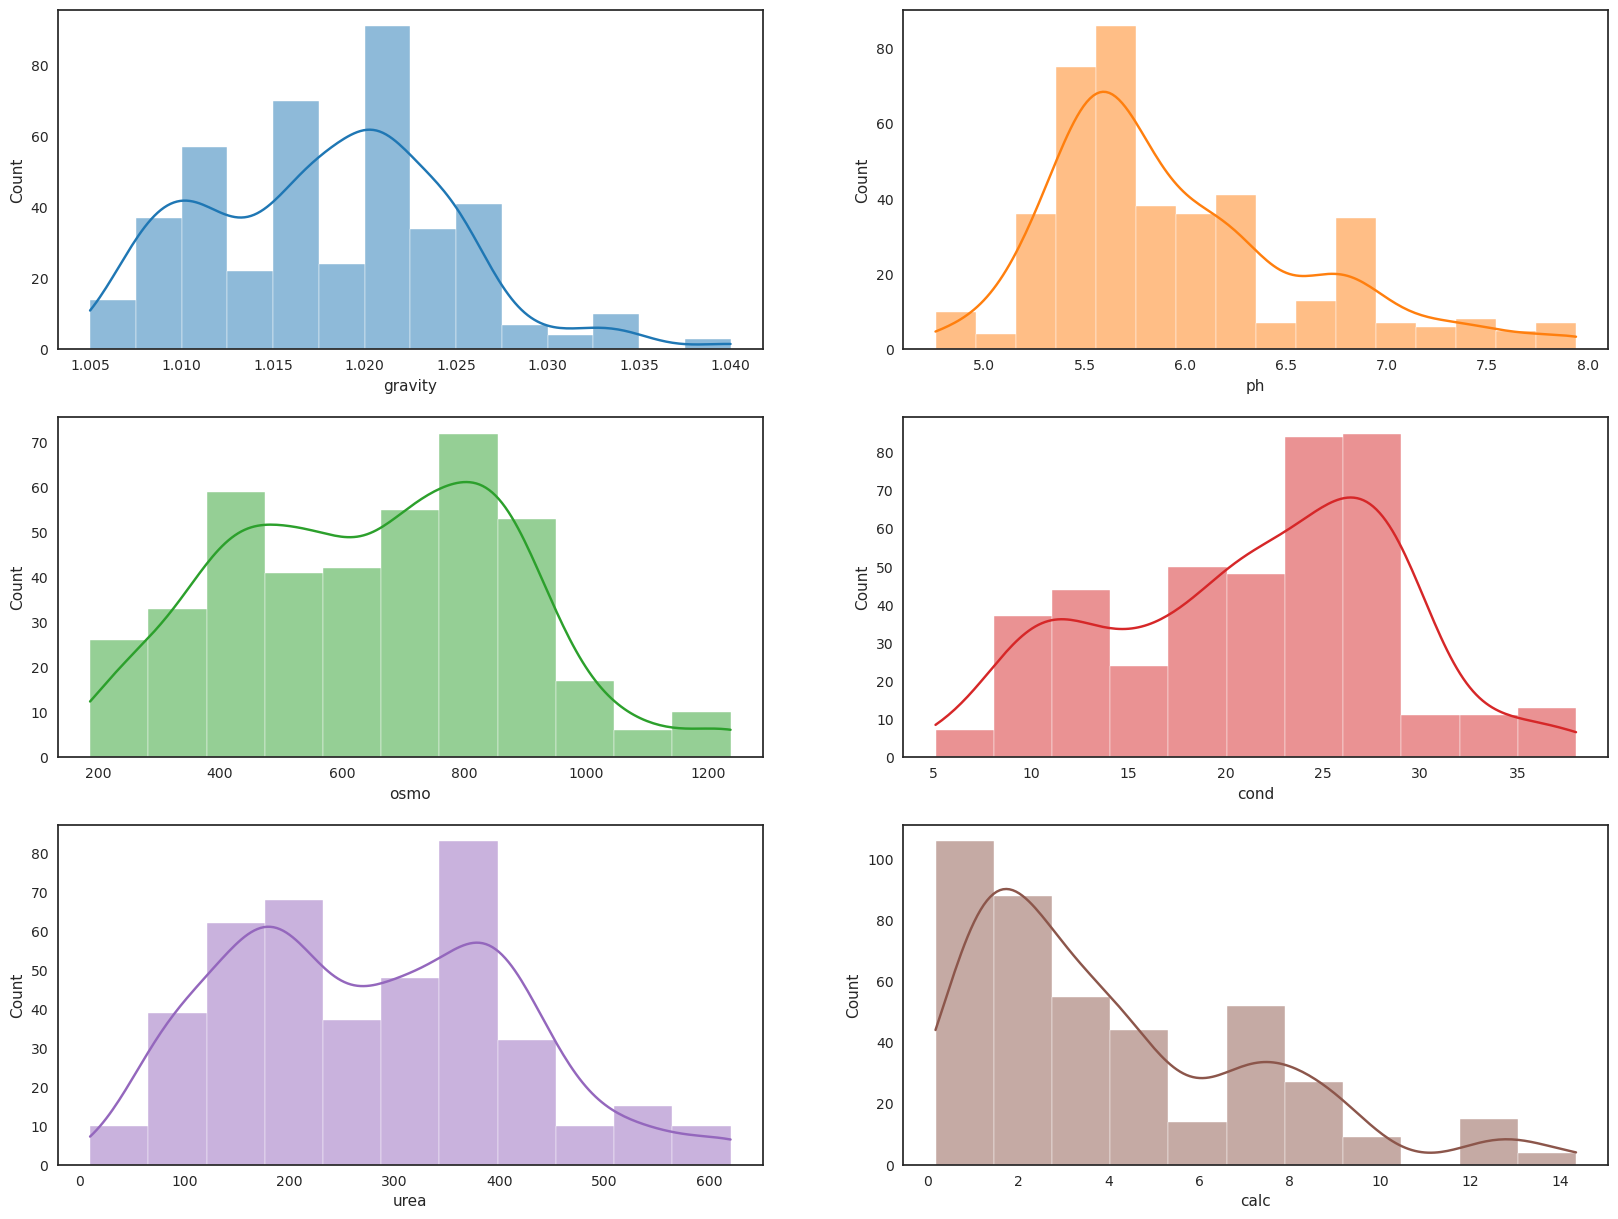

In [43]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
colors = sns.color_palette("tab10")
sns.histplot(data=data, x="gravity", kde=True, color=colors[0], ax=axs[0, 0])
sns.histplot(data=data, x="ph", kde=True, color=colors[1], ax=axs[0, 1])
sns.histplot(data=data, x="osmo", kde=True, color=colors[2], ax=axs[1, 0])
sns.histplot(data=data, x="cond", kde=True, color=colors[3], ax=axs[1, 1])
sns.histplot(data=data, x="urea", kde=True, color=colors[4], ax=axs[2, 0])
sns.histplot(data=data, x="calc", kde=True, color=colors[5], ax=axs[2, 1])

0    55.555556
1    44.444444
Name: target, dtype: float64

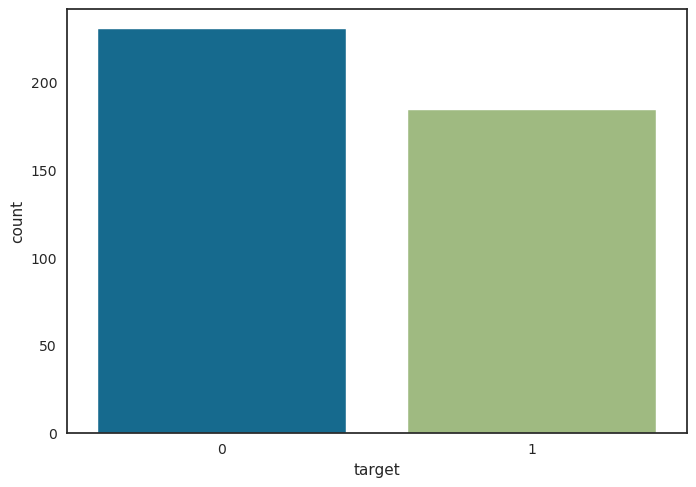

In [44]:
sns.countplot(data=data, x="target")
(data['target'].value_counts()/len(data))*100 # there is no class imbalance

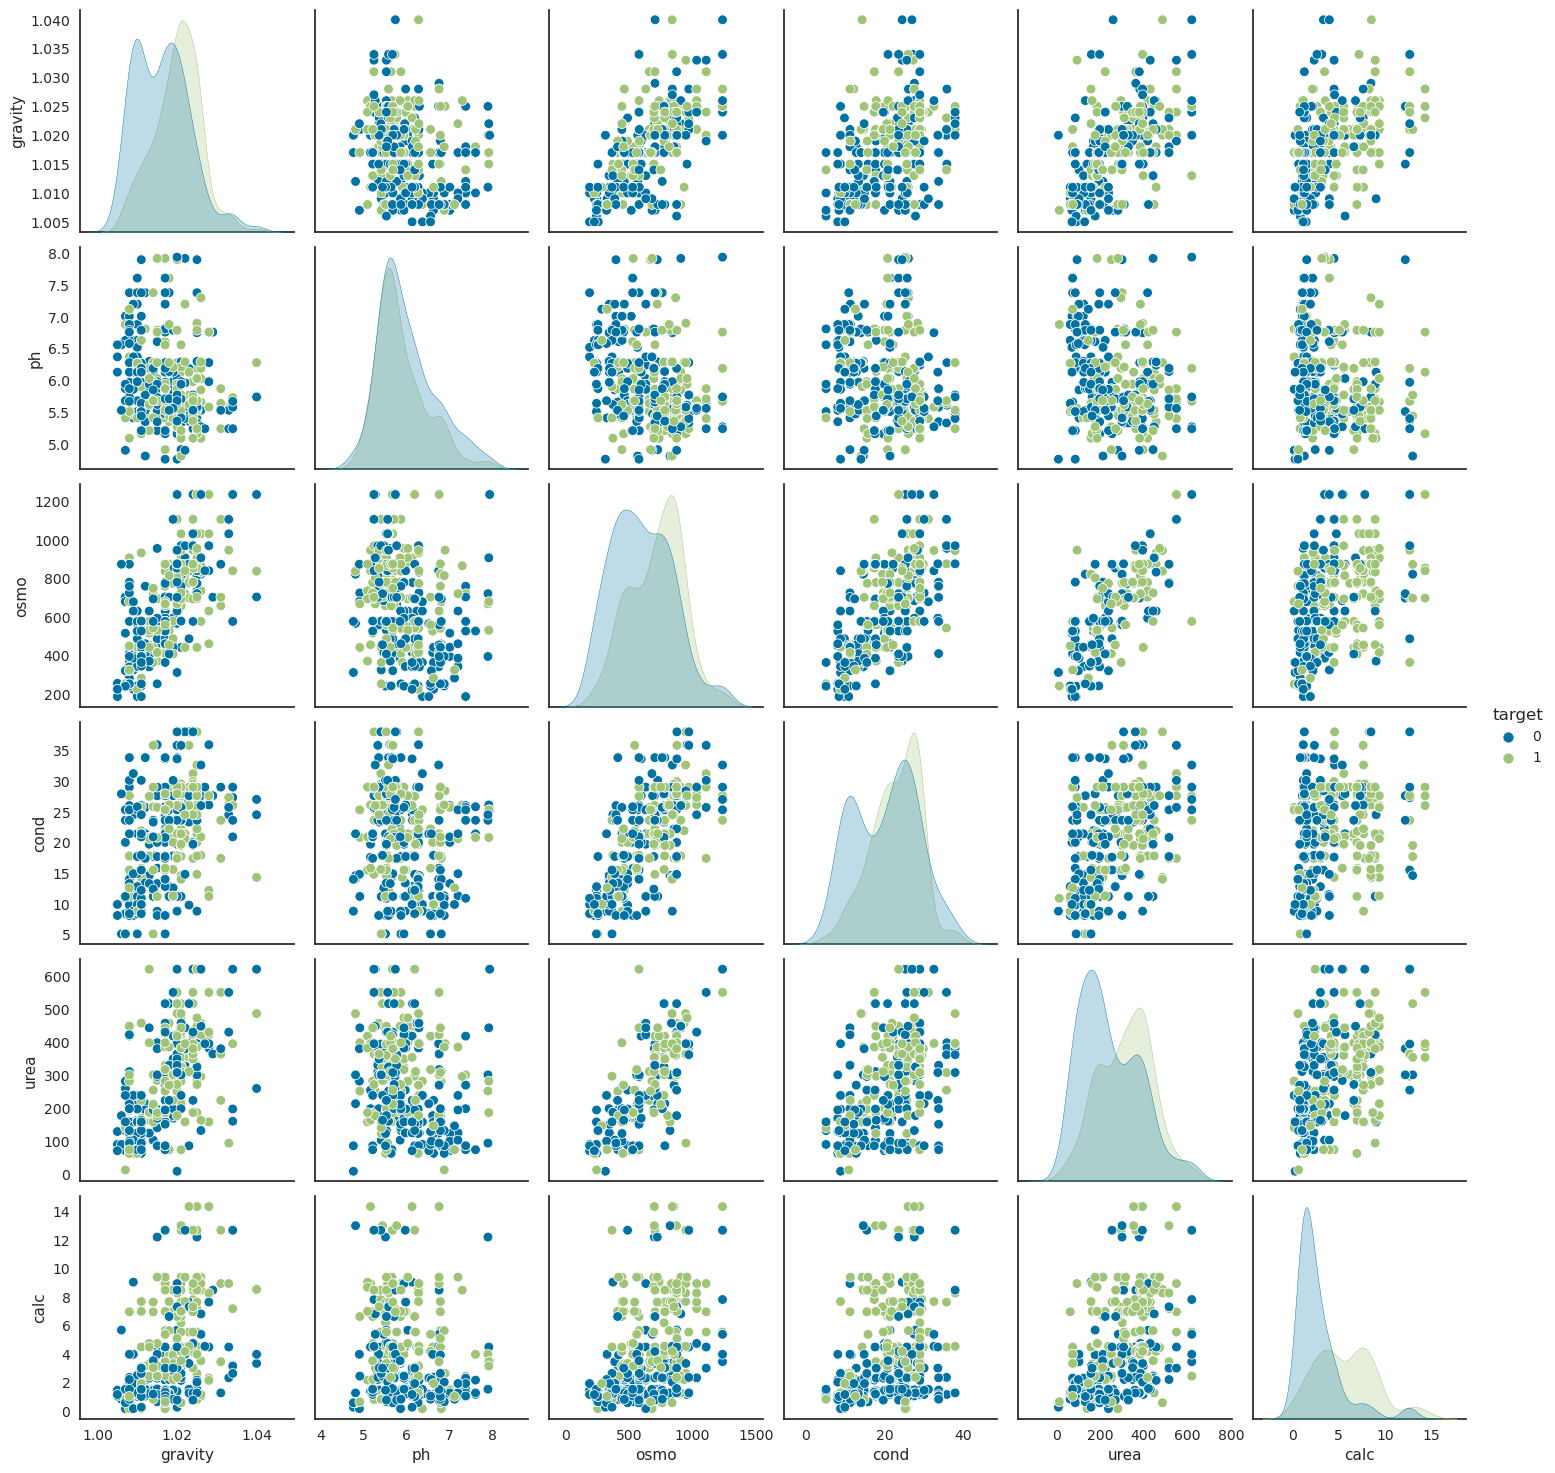

In [45]:
sns.pairplot(data, hue='target')

In [46]:
from pycaret.classification import *

In [47]:
s = setup(data, target = 'target', session_id = 123, ignore_features=['id'], train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(414, 7)"
4,Transformed data shape,"(414, 7)"
5,Transformed train set shape,"(331, 7)"
6,Transformed test set shape,"(83, 7)"
7,Ignore features,1
8,Numeric features,6
9,Preprocess,True


In [48]:
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6980,0.7646,0.5195,0.7217,0.5913,0.3702,0.3873,0.0380
lr,Logistic Regression,0.7042,0.7611,0.5595,0.7161,0.6131,0.3869,0.4021,0.4200
catboost,CatBoost Classifier,0.7071,0.7587,0.6338,0.6913,0.6532,0.4029,0.4112,0.2900
qda,Quadratic Discriminant Analysis,0.7041,0.7555,0.5257,0.7386,0.6026,0.3828,0.4021,0.0380
rf,Random Forest Classifier,0.6830,0.7505,0.5800,0.6693,0.6103,0.3495,0.3599,0.1730
nb,Naive Bayes,0.6622,0.7474,0.6624,0.6194,0.6321,0.3231,0.3314,0.0370
et,Extra Trees Classifier,0.6921,0.7474,0.5938,0.6806,0.6274,0.3694,0.3769,0.1700
lightgbm,Light Gradient Boosting Machine,0.6618,0.7231,0.6200,0.6263,0.6189,0.3168,0.3201,0.1890
gbc,Gradient Boosting Classifier,0.6496,0.7224,0.5805,0.6176,0.5863,0.2871,0.2971,0.0850
ada,Ada Boost Classifier,0.6620,0.7175,0.5886,0.6268,0.5923,0.3104,0.3211,0.0860


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [49]:
tuned_best = tune_model(best, n_iter=50, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6176,0.6421,0.4000,0.6000,0.4800,0.1964,0.2065
1,0.7576,0.8111,0.5333,0.8889,0.6667,0.4943,0.5342
2,0.6667,0.6815,0.6667,0.6250,0.6452,0.3315,0.3321
3,0.6364,0.6185,0.4000,0.6667,0.5000,0.2414,0.2609
4,0.7273,0.8296,0.5333,0.8000,0.6400,0.4343,0.4575
5,0.8182,0.9148,0.7333,0.8462,0.7857,0.6292,0.6341
6,0.5758,0.7407,0.2000,0.6000,0.3000,0.0941,0.1234
7,0.7273,0.7707,0.5714,0.7273,0.6400,0.4255,0.4336
8,0.7576,0.8158,0.5714,0.8000,0.6667,0.4844,0.5013


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 36 candidates, totalling 360 fits


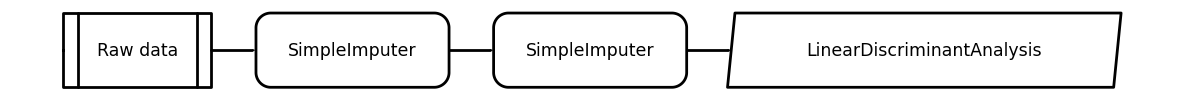

In [50]:
evaluate_model(tuned_best)

In [51]:
final_model = finalize_model(tuned_best)

In [52]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
ids = test_data['id']
test_data = test_data.drop('id', axis=1)

In [53]:
yhat = predict_model(final_model, raw_score = True, data = test_data)

In [56]:
submission = pd.DataFrame({'id': ids, 'target': yhat['prediction_score_1']})
submission.to_csv('submission.csv',index=False)